In [14]:
import pandas as pd
import glob

In [15]:
csvfiles = glob.glob("data/*.csv")

dfs = []

for file in csvfiles:
    df = pd.read_csv(file)
    
    dfs.append(df)
    
data = pd.concat(dfs)

data

,Unnamed: 0,agency,firename,lat,lon,startdate,hectares,stage_of_control,timestamp
0,0,pc,2022RM1,50.7606,-99.6775,2022-05-25 14:37:57,400.0,UC,2022-06-14 12:37:45+00:00
1,1,nt,FS004-22,63.7368,-121.369,2022-06-02 22:49:00,190.0,OC,2022-06-14 12:37:45+00:00
2,2,nt,FS003-22,62.1872,-121.94,2022-06-02 22:58:00,1211.0,OC,2022-06-14 12:37:45+00:00
3,3,yt,2022WL001,60.0275,-128.745,2022-05-23 03:49:00,2.0,UC,2022-06-14 12:37:45+00:00
4,4,bc,2022-G80265,57.3972,-122.377,2022-06-03 22:56:00,545.0,UC,2022-06-14 12:37:45+00:00
...,...,...,...,...,...,...,...,...,...
187,187,sk,23BR-AIR02,53.3602,-106.898,2023-05-07 16:47:43,13.0,OC,2023-05-08 10:36:31
188,188,bc,2023-G80190,56.3376,-121.101,2023-05-03 23:46:00,60.0,UC,2023-05-08 10:36:31
189,189,sk,23BN-VERMETTE,55.6443,-109.219,2023-04-29 19:52:08,12000.0,OC,2023-05-08 10:36:31
190,190,nb,61223,45.9474,-66.8425,2023-05-08 01:56:38,0.1,BH,2023-05-08 10:36:31


In [16]:
pivot = data.loc[data["agency"] != "ak", :].pivot_table(index="firename", values="timestamp", aggfunc="nunique").sort_values("timestamp", ascending=False)

pivot.head(5)

,timestamp
firename,
MWF-022-2022,1121
Moose,957
SS018-22,939
Diamond Watch,931
2022-R90436,904


In [17]:
pivot["duration"] = (pivot["timestamp"] * 2) / 24

pivot.head(5)

,timestamp,duration
firename,,
MWF-022-2022,1121,93.416667
Moose,957,79.750000
SS018-22,939,78.250000
Diamond Watch,931,77.583333
2022-R90436,904,75.333333


In [18]:
data = data.dropna(subset="startdate")

In [19]:
data[data["startdate"].isna()]

,Unnamed: 0,agency,firename,lat,lon,startdate,hectares,stage_of_control,timestamp


In [20]:
data["startdate"] = pd.to_datetime(data["startdate"], errors="coerce")

C:\Users\dexmc\AppData\Local\Temp\ipykernel_45304\4210336447.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["startdate"] = pd.to_datetime(data["startdate"], errors="coerce")


In [21]:
starts = data[["firename", "startdate"]].groupby("firename").min()

starts.head(5)

,startdate
firename,
01-005-2022,2022-07-25 18:54:37
01-006-2022,2022-07-28 07:00:00
01-007-2022,2022-09-16 07:00:00
03-005-2022,2022-07-11 22:00:00
03-006-2022,2022-08-05 07:00:00


In [22]:
pivot = pivot.join(starts)

pivot

,timestamp,duration,startdate
firename,,,
MWF-022-2022,1121,93.416667,2022-06-14 00:43:00
Moose,957,79.750000,2022-07-17 16:00:00
SS018-22,939,78.250000,2022-06-16 23:06:00
Diamond Watch,931,77.583333,2022-07-14 18:00:00
2022-R90436,904,75.333333,2022-07-03 01:10:00
...,...,...,...
SWF-152-2022,1,0.083333,2022-09-07 15:47:00
2022-K42101,1,0.083333,2022-08-28 18:07:00
2023-N20204,1,0.083333,2023-05-04 19:13:00


In [23]:
fire1 = data[data["firename"] == "MWF-022-2022"] 

fire1

,Unnamed: 0,agency,firename,lat,lon,startdate,hectares,stage_of_control,timestamp
78,78,ab,MWF-022-2022,59.4184,-110.813,2022-06-14 00:43:00,40.0,BH,2022-06-14 12:37:45+00:00
68,68,ab,MWF-022-2022,59.4184,-110.813,2022-06-14 00:43:00,40.0,BH,2022-06-14 14:37:50+00:00
61,61,ab,MWF-022-2022,59.4184,-110.813,2022-06-14 00:43:00,40.0,BH,2022-06-14 16:37:33+00:00
55,55,ab,MWF-022-2022,59.4184,-110.813,2022-06-14 00:43:00,40.0,BH,2022-06-14 18:37:38+00:00
52,52,ab,MWF-022-2022,59.4184,-110.813,2022-06-14 00:43:00,40.0,BH,2022-06-14 20:38:03+00:00
...,...,...,...,...,...,...,...,...,...
138,138,ab,MWF-022-2022,59.4184,-110.813,2022-06-14 00:43:00,33207.1,UC,2022-10-31 09:50:15+00:00
134,134,ab,MWF-022-2022,59.4184,-110.813,2022-06-14 00:43:00,33207.1,UC,2022-10-31 12:53:13+00:00
134,134,ab,MWF-022-2022,59.4184,-110.813,2022-06-14 00:43:00,33207.1,UC,2022-10-31 15:51:32+00:00
136,136,ab,MWF-022-2022,59.4184,-110.813,2022-06-14 00:43:00,33207.1,UC,2022-10-31 18:50:22+00:00


<AxesSubplot:xlabel='timestamp'>

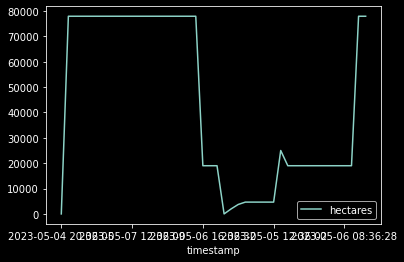

In [28]:
data[data["firename"] == "EWF-031-2023"].sort_values("startdate", ascending=True).set_index("timestamp")[["hectares"]].plot()